# Basic ML algorithms for classification and prediction

In this notebook, we're going to try out two of the most basic ML algorithms for prediction and classification - linear and logistic regression.

We're also going to be learning about the process of preparing our data for ML, variables, vectors, matrices, the train/test split and evaluation methods.

We  will use the scikit-learn library (which you hopefully have installed since last week) to create our two basic models. When coding, this library is written as sklearn.

In [48]:
from IPython.display import Image
from IPython.core.display import HTML 

 We are importing pandas as well as seaborn for the graphs and sklearn.
Froms sklearn we're importing two models that we'll use - Linear and Logistic Regression as well as some metrics that we will use to evaluate our models.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In this Notebook we're dealing with two supervised Machine Learning models, one for classification and one for regression.


Classification algorithm:
- logistic regression


Regression algorithm:
- linear regression

### Building a model

The steps to building and using a model are:

1. Define: What type of model will it be? 
2. Fit: Capture patterns from provided data. This is the heart of modeling.
3. Classify/Predict: Just what it sounds like
4. Evaluate: Determine how accurate the model's predictions are.


### Data for Machine learning tasks

- data can as we know be structured or unstructured (tables and databases vs novels or text messages)
- for basic ML it's best if data is structured
- tabular based dataset contains data organized in rows and columns
- every column contains a feature, which is also known as a variable, a dimension or an attribute
- each column is known as a vector



In [52]:
Image(url= "img/data.png",width=500, height=1500)
# source: Machine Learning for Absolute Beginners, Oliver Theobald

### Variables

- in machine learning, the terms <b>"dependent variable"</b> and <b>"independent variable"</b> are used to describe the relationship between features (inputs) and targets (outputs) in a dataset. These variables play crucial roles in training and building machine learning models.

<u>Dependent Variable: Also known as the "target variable" or "output variable" </u>:

   - the dependent variable is the variable that we want to predict or understand based on the input features. In supervised learning, the model learns to make predictions or infer patterns in the dependent variable based on the independent variables
   - The dependent variable is typically denoted as "y" and represents the outcome or the variable of interest in the problem.
   - Example: If we are building a model to predict housing prices, the dependent variable would be the actual prices of             the houses.

In [53]:
Image(url= "img/variables.png",width=500, height=1500)
# source: https://prowritingaid.com/dependent-variable, Krystal Craiker

<u>Independent Variables: Also known as "predictor variables" or "input features" </u>:

   * independent variables are the variables that are used to predict or explain the dependent variable
   * the features or attributes that provide information to the model for making predictions. Independent variables are denoted as "X" and represent the input data or the set of features used in the model
   * Example: In the housing price prediction example, the independent variables could be features such as the size of the house, number of bedrooms, location, etc.

The relationship between the dependent and independent variables forms the basis of machine learning models. The goal is to find patterns, relationships, or dependencies between the independent variables and the dependent variable so that the model can generalize and make accurate predictions on unseen data.



## How to find the variables in our table/dataset?

- vectors store the X and y values and multiple vectors (columns) are referred to as matrices
- in the case of the supervised learning the dependent variable (y) will already be in the table and be used to identify patterns in relation to the independent variable (X)
- the y value is often but not always represented in the final column

# Prediction - Linear regression 
- simple technique for predicting an unknown variable using the result that you know


We can imagine a simple example of number of viewers depending on the season of a tv show (1-9) as shown on the plot below:

- the X axis (the independent variable) is the number of seasons, while the y axis is the number of viewers per season
- we want to predict the number of viewers for the tents seasons
- the line in linear regression is also called a <b> hyperplane </b>

- the goal is to figure out where to place the hyperplane so that the distance between it to the datapoints is smallest possible

In [54]:
Image(url= "img/linear_r.png",width=500, height=1500)
# source: Machine Learning for Absolute Beginners, Oliver Theobald

- by calculating the linear regression, we actually calculate the slope of the hyperplane


<u>For those who want to know more: </u>

- formula for linear regression:
```
y = bx + a

```

- in which y is the dependent variable, x the independent one
- a is the point where the hyperplane crosses the y-axis or the value of y when x=0
- b discates the steepenes of the slope and explains relationship between x and y
- read more about this in Machine Learning for Absolute Beginners by Oliver Theobald, page 57


In [55]:
Image(url= "img/linear2.png",width=500, height=1500)
# source: Machine Learning for Absolute Beginners, Oliver Theobald

The first step (as always) is to clean our data. In this case, we have already done a lot of data cleaning in the previous notebook. What we still need to do is adjust some of our data to the algorithm that we're using.


### Data cleaning (scrubbing)

- modifying and removing incomplete, incorrectly formatted, irrelevant or duplicated data
- converting text based data to numeric values
- redesigning features



Let's read in our pickle file for the sales dataframe that we previously worked on.

In [56]:
sales  = pd.read_pickle('sales.pkl')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,4.0110,80.2200,2019-03-08,2023-05-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-05-16 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-05-16 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-05-16 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,2023-05-16 18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,25,3


We see that our dataframe was perfectly preserved through the pickling process.

In [57]:
sales = sales.drop('gross margin percentage', axis = 1)

In [58]:
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,Day,Month
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,4.0110,80.2200,2019-03-08,2023-05-16 10:29:00,Cash,76.40,3.8200,9.6,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-05-16 13:23:00,Credit card,324.31,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-05-16 20:33:00,Ewallet,465.76,23.2880,8.4,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-05-16 10:37:00,Ewallet,604.17,30.2085,5.3,8,2
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,2023-05-16 18:30:00,Ewallet,597.73,29.8865,4.1,25,3
6,355-53-5943,,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,2023-05-16 14:36:00,Ewallet,413.04,20.6520,5.8,25,2
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,2023-05-16 11:38:00,Ewallet,735.60,36.7800,8.0,24,2
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,2023-05-16 17:15:00,Credit card,72.52,3.6260,7.2,10,1
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,2023-05-16 13:27:00,Credit card,164.52,8.2260,5.9,20,2
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2019-02-06,2023-05-16 18:07:00,Ewallet,57.92,2.8960,4.5,6,2


### Feature selection
- identifying variables most relevant to our hypothesis, preserving features unnecessary to the output may manipulate and derail the models accuracy
- it means selecting the columns that we need for our analysis, otherwise our results might become skewed
- one thing that can help us choose the data is correlation


### Digression - correlation


"In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it usually refers to the degree to which a pair of variables are linearly related" - Wikipedia, Correlation

To establish what we can predict in a dataset, we first need to see which variables are linearly related (e.g. if one goes up so does the other).

We can use a heatmap for that - we see that e.g. Tax and Total have a high correlation, but that Unit price and Rating do not.

That means that in our dataset, using Unit price to predict the Rating will not be useful, while using e.g. Quantity and Tax to predict the Total, might be.

<AxesSubplot:>

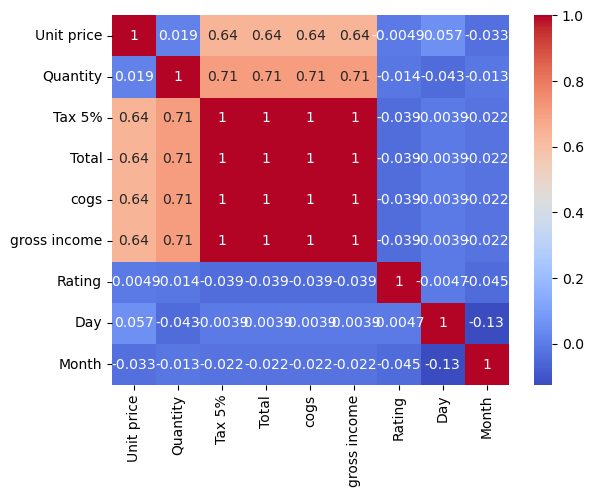

In [59]:
sales_corr = sales.corr()
# dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python
# Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.
sns.heatmap(sales_corr,annot=True,cmap='coolwarm')

### One- hot encoding
- converting text-based values in columns into numeric values (binary form)
- we need to do this for linear regression, e.g. because simply some algorithms require numerical data 
- 0 represents False, 1 represent True
- numerical values in our datasets should not contain commas or fullstops


In [43]:
sales = pd.get_dummies(sales, columns = ['City','Customer type', 'Customer type', 'Gender', 'Payment', 'Product line', 'Branch'])

In [44]:
correlation = sales['Quantity'].corr(sales['Unit price'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.018810459527615234


With linear regression models, we want our independent variables to have a high correlation to the dependent variable, but not to have a high correlation to each other.

In [45]:
correlation = sales['Quantity'].corr(sales['gross income'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.7064971632547383


In [46]:
correlation = sales['Unit price'].corr(sales['gross income'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.636840529176641


In [47]:
sales_corr = sales.corr()
sales_corr

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Day,Month,City_Mandalay,...,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Branch_,Branch_A,Branch_B,Branch_C
Unit price,1.000000,0.018810,0.636815,0.636841,0.636841,0.636841,-0.004924,0.056848,-0.032735,-0.007104,...,-0.025594,0.020456,0.006280,-0.023144,-0.002279,0.023368,0.015562,-0.025704,-0.007104,0.031924
Quantity,0.018810,1.000000,0.706479,0.706497,0.706497,0.706497,-0.014036,-0.043089,-0.012655,-0.000175,...,0.029661,-0.066218,-0.007148,0.010273,0.028966,0.006549,0.005099,-0.015207,-0.000175,0.015110
Tax 5%,0.636815,0.706479,1.000000,0.999998,0.999998,0.999998,-0.038700,-0.003920,-0.022030,-0.004097,...,-0.001985,-0.038110,-0.002806,-0.001066,0.027787,0.017602,0.013811,-0.039536,-0.004097,0.042911
Total,0.636841,0.706497,0.999998,1.000000,1.000000,1.000000,-0.038714,-0.003873,-0.022048,-0.004047,...,-0.001995,-0.038075,-0.002774,-0.001185,0.027815,0.017632,0.013812,-0.039483,-0.004047,0.042808
cogs,0.636841,0.706497,0.999998,1.000000,1.000000,1.000000,-0.038714,-0.003873,-0.022048,-0.004047,...,-0.001995,-0.038075,-0.002774,-0.001185,0.027815,0.017632,0.013812,-0.039483,-0.004047,0.042808
gross income,0.636841,0.706497,0.999998,1.000000,1.000000,1.000000,-0.038714,-0.003873,-0.022048,-0.004047,...,-0.001995,-0.038075,-0.002774,-0.001185,0.027815,0.017632,0.013812,-0.039483,-0.004047,0.042808
Rating,-0.004924,-0.014036,-0.038700,-0.038714,-0.038714,-0.038714,1.000000,-0.004695,-0.045041,-0.059866,...,-0.015893,0.022323,0.032963,0.003274,-0.033076,-0.010800,-0.021204,0.026010,-0.059866,0.035520
Day,0.056848,-0.043089,-0.003920,-0.003873,-0.003873,-0.003873,-0.004695,1.000000,-0.125467,-0.003113,...,0.052689,-0.005223,-0.003322,0.026209,-0.054045,-0.016951,0.035194,0.004768,-0.003113,-0.004017
Month,-0.032735,-0.012655,-0.022030,-0.022048,-0.022048,-0.022048,-0.045041,-0.125467,1.000000,0.006788,...,0.034306,-0.031335,0.005948,0.022016,0.021912,-0.051695,0.000412,0.031926,0.006788,-0.038928
City_Mandalay,-0.007104,-0.000175,-0.004097,-0.004047,-0.004047,-0.004047,-0.059866,-0.003113,0.006788,1.000000,...,-0.017718,0.022781,-0.045563,0.020528,-0.018031,0.038611,-0.022432,-0.504476,1.000000,-0.497744


### Row compression and variable  creation
- reducing the number of rows and thus compressing he number of data points
- numeric variables are easier to aggregate (mean, mode)


In this step, we will create a DataFrame called `X` holding the predictive features. We're also creating a second dataframe, `y`, that holds the vavriable that we want to predict.

In [61]:
X = sales[['Quantity', 'Unit price']]
y = sales['gross income']
print(f'{X}, {y}')

    Quantity  Unit price
1          5       15.28
2          7       46.33
3          8       58.22
4          7       86.31
5          7       85.39
..       ...         ...
9          2       58.03
10        10       17.49
11         1       60.95
12         1       40.35
13        10       97.38

[1008 rows x 2 columns], 1      3.8200
2     16.2155
3     23.2880
4     30.2085
5     29.8865
       ...   
9      5.8030
10     8.7450
11     3.0475
12     2.0175
13    48.6900
Name: gross income, Length: 1008, dtype: float64


### Train/Test split
- in ML, input data is split into train and test
- the first split is the training data, which is the initial reserve of data used to develop th the model (e.g. when building an email spam detector, then from the training data, false positives can be detected and also e.g.email notifications can be excluded)
- when a model is developed based on patterns extracted from the training dana and we are satisfied with the performance of the model and the accuracy of its prediction, we can test the model on the remaining data (the test data)
- if we are satisfied with the model’s performance on the test data, than the model is ready set go
- the ratio is usually 80/20, unless if we have a large dataset then 90/10 is good
- before we split the data, we need to randomize the order (shuffling) to avoid potential bias in th data (ordered by date or alphabetically)
- random_state = can be any int value, ensures reproducibility of results on many runs (if you keep the number the same, but can be any). It will  ensure that the initial weights and biases of the model are initialized in the same way every time you train the model with the same dataset.

In [62]:
# Split data into test/train set (80/20 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [63]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [64]:
print(X)

    Quantity  Unit price
1          5       15.28
2          7       46.33
3          8       58.22
4          7       86.31
5          7       85.39
..       ...         ...
9          2       58.03
10        10       17.49
11         1       60.95
12         1       40.35
13        10       97.38

[1008 rows x 2 columns]


In [65]:
y_pred = model.predict(X_test)
print(y_pred)

[25.02501999 13.68043384  7.67571449  1.87060461 23.85334304 17.6616597
  6.2825262   8.33464063  5.4830326  29.63469905 -2.18706846 20.86264916
 -6.5832776  34.47710521 17.4902489  10.13101489  6.78030536 16.31502721
 12.2844416  15.93220963 -2.62485366  9.6588416  12.25978768  2.15792894
 -2.89963988 -8.26003433 22.89063933 16.12287762  9.06609884 33.78453178
 34.87563524 27.8822359   4.69512517 20.05437334 35.8093476  15.07420367
  6.54440391 16.81825499 30.50989905 27.39022388  7.91833502  6.97621083
 20.04707272 16.64684419 18.05458185 13.00918073 26.40360704 12.20032337
 30.978898    9.56482995 35.55942645 17.26799676 -0.11813038 35.3715624
 13.25106046 12.9095612  -2.3468931  30.81870296 17.79624887 31.3538853
 19.28852704  9.56144446  2.85087277  1.59751113 20.34317927 29.14681331
 19.97231825  6.57376566 -3.61670798 13.62192148 18.99130929  9.02271739
 16.51204388 18.95205412  2.24241757  5.76173397  1.52180473 16.98030203
 11.75449675 25.79367024 14.30666463 19.30328755 28.57

### Evaluation for regression


1) MAE measures the average of the errors in a set of predictions, i.e. how far the regression line is to the actual data points.The MAE measures the average absolute difference between the predicted and actual values in a regression problem.

2) R-squared Score: The R-squared score, also known as the coefficient of determination, represents the proportion of the variance in the target variable that can be explained by the regression model. The R-squared value ranges from 0 to 1, of 1 indicates that the model perfectly explains the variance in the target variable.

In [66]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)


Mean Absolute Error: 2.927885650956976
R-squared Score: 0.8881180842629107


The MAE value of 2.927885650956976 represents the average magnitude of errors between the predicted and actual values. A lower MAE indicates better model performance. In this case, a MAE of 2.93 suggests that, on average, the predicted gross income differs from the actual gross income by approximately $2.93. However, without additional context, it is difficult to assess whether this MAE value is good or bad. It is recommended to compare it with other models or benchmarks in the same domain to determine its adequacy.

The R-squared score of 0.8881180842629107 measures the proportion of the variance in the gross income that can be explained by the Quantity and Unit Price variables. It ranges from 0 to 1, with 1 indicating a perfect fit. In this case, an R-squared value of 0.8881 suggests that approximately 88.81% of the variability in the gross income can be explained by the Quantity and Unit Price variables. Generally, a higher R-squared value is considered better, but the interpretation depends on the specific context and the available benchmarks.

In [67]:
invoice = [
   7, #quantity
   15.28, #unit price
]

# Make prediction
invoice = model.predict([invoice])
invoice

C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.24174018])

<div class="alert alert-block alert-info">
<b>Exercise 1 Linear Regression</b>
<p>
Which variable would be the dependent variable for the following model?
    <li>size </li>
     <li> total_bill and tip</li>
     <li> total_bill</li>
    <li> tip </li>

</p>
  
</div>

<div class="alert alert-block alert-info">
<b>Exercise 2 Linear Regression</b>
<p>
From looking only at the data preview below, which variable(s) appear to have a linear relationship with total_bill?
    <li>smoker </li>
     <li> total_bill and size</li>
     <li> time</li>
    <li> sex </li>

</p>
  
</div>

<div class="alert alert-block alert-info">
<b>Exercise 3 Linear Regression</b>
<p>
It's important for the independent variable to be strongly correlated with the dependent variable and one or more of the other independent variables. True or False?
</p>
  
</div>

In [84]:
Image(url= "img/table1.png",width=500, height=1500)
# source: Machine Learning for Absolute Beginners, Oliver Theobald

# Classification - Logistic regression 

- since it is classification, the dependent variable is  a discrete categorical one (e.g. if we want to predict a new customer vs returning one)
- this algorithm is often used to predict between two discrete classes, e.g. pregnant and not pregnant
- used in fraud detection, disease diagnosis, emergency detection, loan detection, identification of spam email etc.



In [87]:
Image(url= "img/logistic.png",width=500, height=1500)
# source: Machine Learning for Absolute Beginners, Oliver Theobald

To predict the type of payment used (the dependent variable),we might consider the Total amount of the invoice and the quantity of items purchased (the independent variables).

In [68]:
X = sales[['Product line', 'Quantity']]
y = sales['Payment']

# Convert non-numeric data using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
print(X)

    Quantity  Product line_Fashion accessories  \
1          5                                 0   
2          7                                 0   
3          8                                 0   
4          7                                 0   
5          7                                 0   
..       ...                               ...   
9          2                                 0   
10        10                                 1   
11         1                                 0   
12         1                                 0   
13        10                                 0   

    Product line_Food and beverages  Product line_Health and beauty  \
1                                 0                               0   
2                                 0                               0   
3                                 0                               1   
4                                 0                               0   
5                                 0         

- after the split we can design the model and apply it to the training data
- the 20 or 30 percent we left for testing is the part that we’re not allowed to train on, otherwise our model will incorrectly be really accurate
- there are a range of metrics for evaluation and choosing the right one depends on the application of the model


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [70]:
# Assign algorithm
model = LogisticRegression(max_iter=10000)

# Link algorithm to X and y variables
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [71]:
# Run algorithm on test data to make predictions
y_pred = model.predict(X_test)

### Evaluation for classification


1) Accuracy: Accuracy measures the overall correctness of the model's predictions by calculating the ratio of correctly classified samples to the total number of samples. It provides a general measure of the model's performance but may not be suitable for imbalanced datasets.


2) Precision: Precision measures the proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions made by the model. It focuses on the accuracy of positive predictions and is useful when the cost of false positives is high.

3) Recall (Sensitivity/True Positive Rate): Recall calculates the proportion of true positive predictions out of all actual positive instances in the dataset. It is a measure of the model's ability to correctly identify positive instances and is useful when the cost of false negatives is high.

4) F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balanced evaluation of the model's performance, taking into account both precision and recall. F1-score is a commonly used metric when the dataset is imbalanced or when you want to strike a balance between precision and recall.

In [72]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('F1-score:', f1)


Accuracy: 0.3811881188118812
F1-score: 0.30704055148926823


In [74]:
# Make prediction
invoice = [
  3, #Quantity
  0, #Product line_Fashion accessories
  0, #Product line_Food and beverages
  1, #Product line_Health and beauty
  0, #Product line_Home and lifestyle
  1, #Product line_Sports and travel



]

# Make prediction
invoice = model.predict([invoice])
invoice

C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Credit card'], dtype=object)

<div class="alert alert-block alert-info">
<b>Exercise 1 Logistic Regression</b>
<p>
Which three variables (in their current form) could we use as the dependent variable to classify penguins?

</p>
  
</div>

<div class="alert alert-block alert-info">
<b>Exercise 2 Logistic Regression</b>
<p>
Which row(s) contain missing values?

</p>
  
</div>

<div class="alert alert-block alert-info">
<b>Exercise 3 Logistic Regression</b>
<p>
Which variable is binary?

</p>
  
</div>

In [86]:
Image(url= "img/table2.png")
# source: Machine Learning for Absolute Beginners, Oliver Theobald

## Literature, tutorials

* Exercises taken from - Machine Learning for Absolute Beginners, Oliver Theobald (https://www.amazon.de/gp/product/B08RWBSKQB/ref=ppx_yo_dt_b_d_asin_title_o00?ie=UTF8&psc=1) (https://bmansoori.ir/book/Machine%20Learning%20For%20Absolute%20Beginners.pdf)
* Tutorial accompanying the book -https://scatterplotpress.teachable.com/courses/enrolled/1247161
* Good tutorial on Kaggle -  https://www.kaggle.com/learn/intro-to-machine-learning